In [1]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt

2024-07-25 14:55:33.578078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


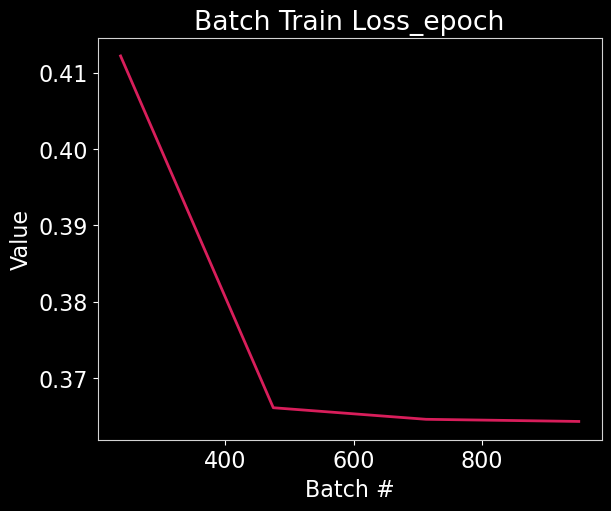

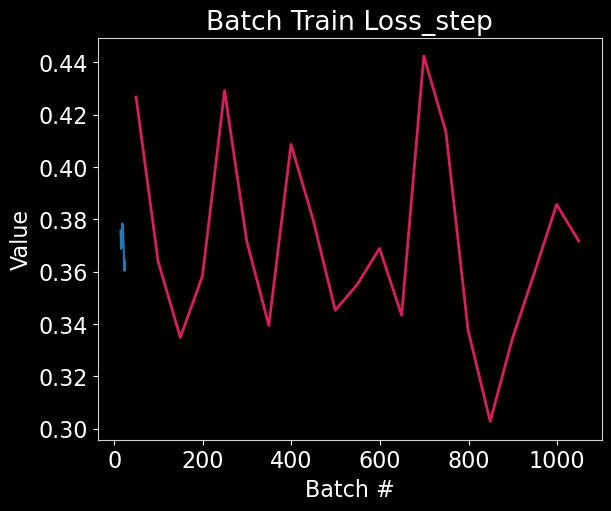

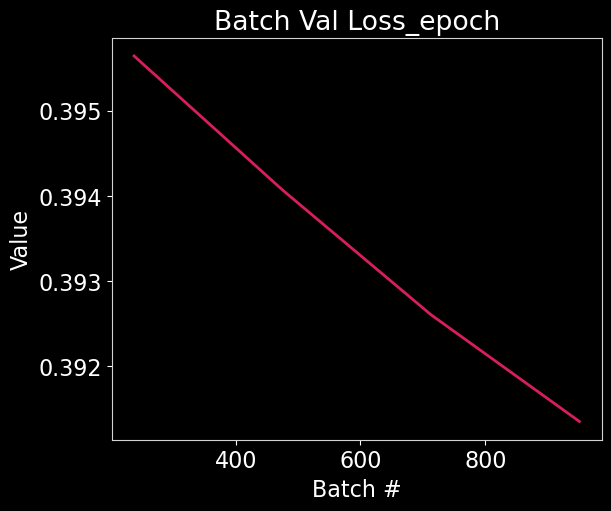

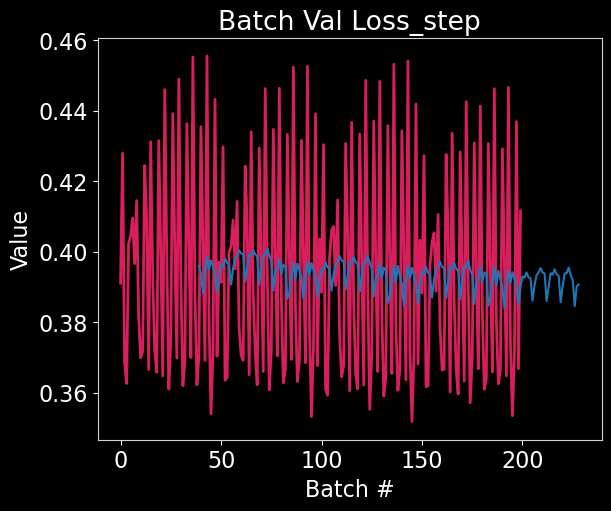

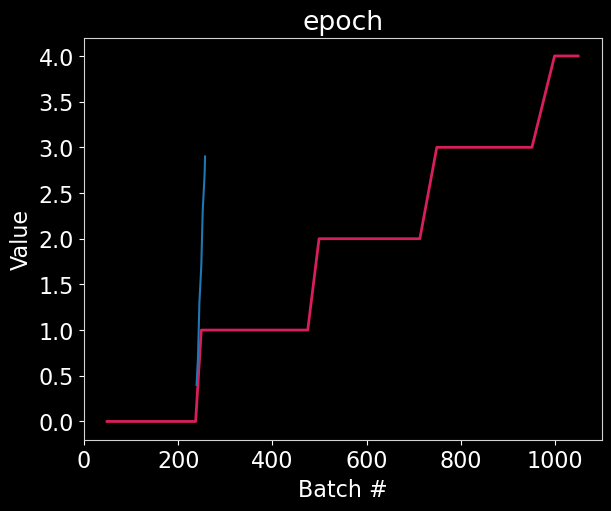

In [17]:
# load in a model output, this will change as we run the models
log_dir = '/home/arushi/Desktop/FDL_2024/events.out.tfevents.1721931148.kanak-workbench.772580.0'

# change the figure parameters here so that we can just grab the output
# into our presentation

plt.rcParams['font.size'] = 16
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# read the model output
reader = SummaryReader(log_dir)
df = reader.scalars

mask = df['tag'] == 'hp_metric'
df   = df[~mask]

# there are 4 different outputs from out model
# TODO: make this dynamic if needed
uniq_tags = df['tag'].unique()

window_size = 10

# plot all the data here
for i in range(len(uniq_tags)):

    # Make sure that y axis is the data plot and x is the epoch 
    # the epoch we are at will be same for all, and is called
    # by 'step' for each tag
    epoch_number = df[(df['tag']) == uniq_tags[i]]['step']

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), layout='constrained')
    y_data = df[(df['tag']) == uniq_tags[i]]['value']
    ax1.plot(epoch_number, y_data, linewidth=2, color='#D81E5B')
    ax1.plot(y_data.rolling(window_size).mean().shift(1), label='moving avg')
    ax1.set_title(uniq_tags[i])
    ax1.set_xlabel('Batch #')
    ax1.set_ylabel('Value')
#     file_name = "model_output_" + "%s.png" % (uniq_tags[i].replace(" ", ""))
#     plt.savefig(file_name) # comment this if we don't want to save the plots and uncomment the next line
#     # plt.show()

In [15]:
df[df['tag'] == 'Batch Train Loss_step']

,step,tag,value
4,49,Batch Train Loss_step,0.426757
5,99,Batch Train Loss_step,0.363795
6,149,Batch Train Loss_step,0.334868
7,199,Batch Train Loss_step,0.358273
8,249,Batch Train Loss_step,0.429197
9,299,Batch Train Loss_step,0.371712
10,349,Batch Train Loss_step,0.339404
11,399,Batch Train Loss_step,0.408633
12,449,Batch Train Loss_step,0.379863
13,499,Batch Train Loss_step,0.345242


In [16]:
df['tag'] 

0      Batch Train Loss_epoch
1      Batch Train Loss_epoch
2      Batch Train Loss_epoch
3      Batch Train Loss_epoch
4       Batch Train Loss_step
                ...          
253                     epoch
254                     epoch
255                     epoch
256                     epoch
257                     epoch
Name: tag, Length: 258, dtype: object